In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

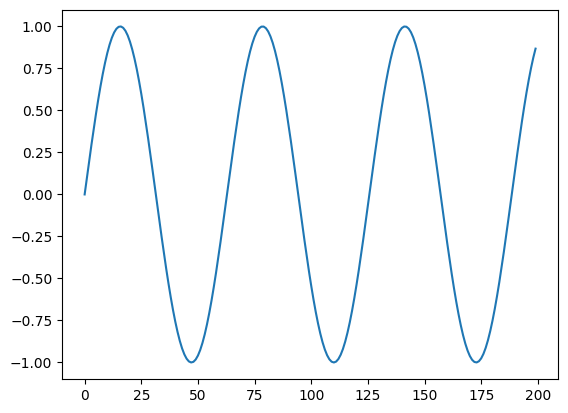

In [2]:
# make the original data
series = np.sin(0.1*np.arange(200)) #+ np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

In [3]:
# Building the dataset

T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape",Y.shape)

X.shape (190, 10) Y.shape (190,)


In [6]:
# try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1),
)

# tran the rnn
r = model.fit(
    X[:N//2], Y[:-N//2],
    epochs=80,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.6735 - val_loss: 0.4456
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4059 - val_loss: 0.1141
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1101 - val_loss: 0.1500
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1551 - val_loss: 0.0144
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0266 - val_loss: 0.0974
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0839 - val_loss: 0.0166
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0212 - val_loss: 0.0853
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0636 - val_loss: 0.0397
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0245 - val_loss: 0.0302
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0311 - val_loss: 0.0100
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0077 - val_loss: 0.0103
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0135 - val_loss: 0.0023
E

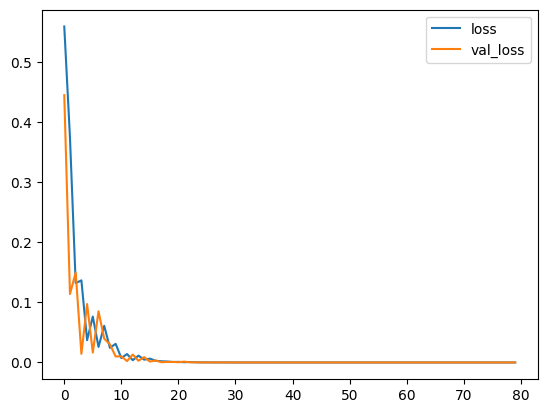

In [8]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [9]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]  # grab the validation targets as the second half o fy and initialise the prediciotns as an empty lsit
validation_predictions = []

# last train input
last_x = X[-N//2] #1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1)) [0,0]

  #update the predictions list
  validation_predictions.append(p)

  #make the new input
  last_x = np.roll(last_x, -1) # we can shift (roll) all the values 1n spo to the left,
  # this is how we update the last variable x
  last_x[-1] = p


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

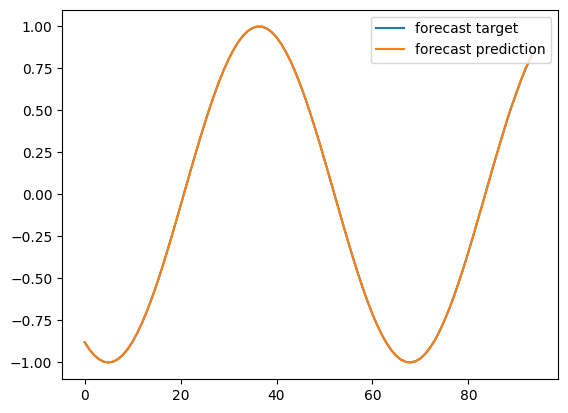

In [10]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()
